(794, 1196)
(794, 794)
(794,)
(1196, 1196)


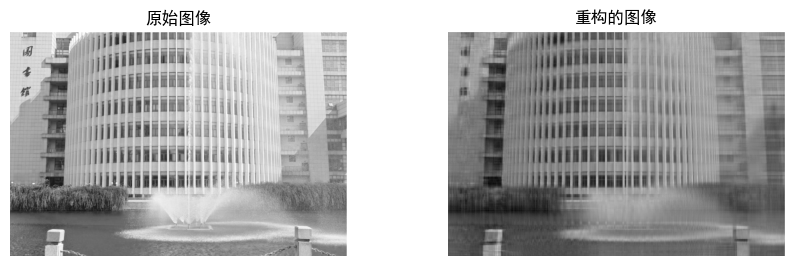

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 读取图片，假设图片路径为"D:\picture\school.png"
mat = plt.imread("D:/picture/school.png")  # [660, 670, 3]
mat = mat[:,:,2]  # 提取图像的第三个通道（蓝色通道）
print(mat.shape)  # 打印矩阵的形状，应该是 (660, 670)

# 进行奇异值分解（SVD）
U, s, VT = np.linalg.svd(mat)
print(U.shape)  # [660,660]
print(s.shape)  # [660]
print(VT.shape)  # [670,670]

# 构造Sigma矩阵，Sigma是一个对角矩阵，其中对角线是奇异值
Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

# 使用前30个奇异值进行矩阵重构
k = 20
mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]  # [660, 670]
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
# 绘制原图和重构图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)
mat= cv2.cvtColor(mat, cv2.COLOR_BGR2RGB)
# 显示原图
ax1.imshow(mat, cmap='gray')
ax1.set_title("原始图像")
ax1.axis('off')  # 去掉横纵坐标

# 显示重构图
ax2.imshow(mat_approx, cmap='gray')
ax2.set_title(f"重构的图像")
ax2.axis('off')  # 去掉横纵坐标

plt.show()
